In [1]:
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import sqlite3
import datetime
import numpy as np

In [2]:
# import and sort data
cnx = sqlite3.connect('C:\\Users\\mitch\\OneDrive\\Documents\\Metis Projects\\Retrieve_MTA_Data\\mta_data.db')
df = pd.read_sql_query("SELECT * FROM mta_data", cnx)

In [3]:
df.columns = [column.strip() for column in df.columns]

In [4]:
df["DATE_TIME"] = pd.to_datetime(df.DATE + " " + df.TIME, format="%m/%d/%Y %H:%M:%S")

In [5]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/19/2022,00:00:00,REGULAR,7695440,2680637,2022-03-19 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/19/2022,04:00:00,REGULAR,7695447,2680645,2022-03-19 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/19/2022,08:00:00,REGULAR,7695452,2680673,2022-03-19 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/19/2022,12:00:00,REGULAR,7695468,2680747,2022-03-19 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/19/2022,16:00:00,REGULAR,7695511,2680791,2022-03-19 16:00:00


In [6]:
df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True, ascending=False)
df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [7]:
# refered to MTA exercise solutions for this code
def get_entries(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        return 0
    return counter

In [8]:
# refered to MTA exercise solutions for this code
def get_exits(row, max_counter):
    counter = row["EXITS"] - row["PREV_EXITS"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["EXITS"], row["PREV_EXITS"])
        return 0
    return counter

In [9]:
# refered to MTA exercise solutions for this code
turnstiles_daily_entries = (df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False).ENTRIES.first())

In [10]:
# refered to MTA exercise solutions for this code
turnstiles_timely_entries = (df.groupby(["C/A", "UNIT", "SCP", "STATION", "TIME"],as_index=False).ENTRIES.mean())

In [11]:
turnstiles_timely_entries.head()

,C/A,UNIT,SCP,STATION,TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,00:00:00,7.695432e+06
1,A002,R051,02-00-00,59 ST,03:00:00,7.683470e+06
2,A002,R051,02-00-00,59 ST,04:00:00,7.695308e+06
3,A002,R051,02-00-00,59 ST,06:46:21,7.683974e+06
4,A002,R051,02-00-00,59 ST,06:49:06,7.683974e+06


In [12]:
turnstiles_timely_entries["PREV_ENTRIES"] = turnstiles_timely_entries.ENTRIES.shift(1)

In [13]:
turnstiles_timely_entries.head()

,C/A,UNIT,SCP,STATION,TIME,ENTRIES,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,00:00:00,7.695432e+06,NaN
1,A002,R051,02-00-00,59 ST,03:00:00,7.683470e+06,7.695432e+06
2,A002,R051,02-00-00,59 ST,04:00:00,7.695308e+06,7.683470e+06
3,A002,R051,02-00-00,59 ST,06:46:21,7.683974e+06,7.695308e+06
4,A002,R051,02-00-00,59 ST,06:49:06,7.683974e+06,7.683974e+06


In [14]:
turnstiles_timely_entries["TIMELY_ENTRIES"] = turnstiles_timely_entries.apply(get_entries, axis=1, max_counter=1000000)

1491673.0 6796964.974358974
157589.5 1725642.141025641
6272138.416666667 138656.78205128206
7667014.583333333 6255600.256410256
12369845.75 7650457.551282051
9627125.75 12340419.474358974
525431.0 9604701.115384616
4627781.645569621 285265.39743589744
5698044.696202531 4657285.0
3354471.1518987343 6648581.846153846
147740.6329113924 3365926.6153846155
4262.797468354431 1340246.1538461538
119897581.59493671 792718.7692307692
5256160.670886076 119919602.0
229267.11392405065 5268424.384615385
5363326.75 249165.92307692306
15827774.083333334 5328801.2727272725
11579960.666666666 15803005.25974026
3967103.5833333335 11559770.012987014
4976767.333333333 3954781.8701298703
2524388.0 4956979.623376624
20225707.916666668 2489200.5584415584
4627965.75 20179664.90909091
545237.75 4538446.636363637
4657196.916666667 1204535.2051282052
885509066.4166666 4609036.487179487
198604.16666666666 885524800.5128205
6293565.083333333 0.0
44258.5 6287686.730769231
6597320.5 31459.73076923077
1573.0 6278217.7

In [15]:
turnstiles_timely_exits = (df.groupby(["C/A", "UNIT", "SCP", "STATION", "TIME"],as_index=False).EXITS.mean())

In [16]:
turnstiles_timely_exits["PREV_EXITS"] = turnstiles_timely_exits.EXITS.shift(1)

In [17]:
turnstiles_timely_exits["TIMELY_EXITS"] = turnstiles_timely_exits.apply(get_exits, axis=1, max_counter=1000000)

1581290.3333333333 2661770.1666666665
5689833.833333333 1571839.717948718
2781675.1666666665 5642038.179487179
233862.75 2733865.0256410255
7147955.416666667 201214.28205128206
3992853.3333333335 7124739.217948718
1495250.3333333333 3979658.1923076925
7998637.088607595 33336.44871794872
3504438.5443037977 8058911.076923077
16642795.58227848 3521152.3076923075
1217147.6202531646 16650939.153846154
61282.22784810127 1223013.5384615385
0.0 1385143.923076923
3554847.240506329 679372.1538461539
2150359.265822785 3591772.0
82027.0506329114 2158363.3846153845
3376106.3333333335 91023.15384615384
6396520.75 3322190.7792207794
4736584.916666667 6371130.688311689
1991813.25 4720031.376623376
760421.0 2419623.974025974
5656254.583333333 746881.3376623377
812381.9166666666 5636850.142857143
2001153.4166666667 783207.7142857143
3384699.8333333335 1410055.8717948718
489253147.9166667 3340803.435897436
290317.25 489308011.9358974
39545329.5 245.03846153846155
101844.33333333333 39448519.92307692
3440

In [18]:
turnstiles_timely_total = pd.merge(turnstiles_timely_entries, turnstiles_timely_exits, on = ["C/A", "UNIT", "SCP", "STATION", "TIME"])

In [19]:
turnstiles_timely_total.head()

,C/A,UNIT,SCP,STATION,TIME,ENTRIES,PREV_ENTRIES,TIMELY_ENTRIES,EXITS,PREV_EXITS,TIMELY_EXITS
0,A002,R051,02-00-00,59 ST,00:00:00,7.695432e+06,NaN,NaN,2.680594e+06,NaN,NaN
1,A002,R051,02-00-00,59 ST,03:00:00,7.683470e+06,7.695432e+06,11962.121795,2.661390e+06,2.680594e+06,19203.891026
2,A002,R051,02-00-00,59 ST,04:00:00,7.695308e+06,7.683470e+06,11838.166667,2.680378e+06,2.661390e+06,18987.179487
3,A002,R051,02-00-00,59 ST,06:46:21,7.683974e+06,7.695308e+06,11334.461538,2.661996e+06,2.680378e+06,18381.538462
4,A002,R051,02-00-00,59 ST,06:49:06,7.683974e+06,7.683974e+06,0.000000,2.661997e+06,2.661996e+06,1.000000


In [20]:
turnstiles_timely_total["TIMELY_TRAFFIC"] = turnstiles_timely_total.TIMELY_ENTRIES + turnstiles_timely_total.TIMELY_EXITS

In [21]:
turnstiles_timely_total = turnstiles_timely_total.dropna()

In [22]:
drop_Cols = ['ENTRIES', 'PREV_ENTRIES', 'TIMELY_ENTRIES', 'EXITS', 'PREV_EXITS', 'TIMELY_EXITS']

In [23]:
turnstiles_timely_total = turnstiles_timely_total.drop(columns = drop_Cols)

In [24]:
turnstiles_timely_total["TIME"] = pd.to_datetime(turnstiles_timely_total['TIME'], format = "%H:%M:%S").dt.hour

In [25]:
turnstiles_timely_total = turnstiles_timely_total.groupby(['STATION', 'TIME'],as_index=False).TIMELY_TRAFFIC.sum()

In [26]:
avg_turnstiles_timely_total = turnstiles_timely_total

In [27]:
avg_turnstiles_timely_total['TIMELY_TRAFFIC'] = avg_turnstiles_timely_total.TIMELY_TRAFFIC.apply(lambda x: x/91)

In [28]:
avg_turnstiles_timely_total.head()

,STATION,TIME,TIMELY_TRAFFIC
0,1 AV,0,79306.771787
1,1 AV,3,26368.943781
2,1 AV,4,26306.283447
3,1 AV,7,37622.841025
4,1 AV,8,46321.088406


In [29]:
station_mealtimes = turnstiles_timely_total.groupby('STATION', as_index = False).TIMELY_TRAFFIC.sum()

In [30]:
station_mealtimes.tail()

,STATION,TIMELY_TRAFFIC
373,WOODLAWN,37549.062130
374,WORLD TRADE CTR,126285.815184
375,WTC-CORTLANDT,152454.355100
376,YORK ST,57781.305640
377,ZEREGA AV,57902.513946


In [31]:
turnstiles_daily_entries.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,01/01/2022,7675936
1,A002,R051,02-00-00,59 ST,01/02/2022,7676054
2,A002,R051,02-00-00,59 ST,01/03/2022,7676298
3,A002,R051,02-00-00,59 ST,01/04/2022,7676554
4,A002,R051,02-00-00,59 ST,01/05/2022,7676817


In [32]:
# refered to MTA exercise solutions for this code
turnstiles_daily_exits = (df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False).EXITS.first())

In [33]:
turnstiles_daily_exits.head()

,C/A,UNIT,SCP,STATION,DATE,EXITS
0,A002,R051,02-00-00,59 ST,01/01/2022,2649668
1,A002,R051,02-00-00,59 ST,01/02/2022,2649829
2,A002,R051,02-00-00,59 ST,01/03/2022,2650233
3,A002,R051,02-00-00,59 ST,01/04/2022,2650658
4,A002,R051,02-00-00,59 ST,01/05/2022,2651066


In [34]:
# refered to MTA exercise solutions for this code
turnstiles_daily_entries[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily_entries
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))

C:\Users\mitch\AppData\Local\Temp/ipykernel_9896/3588342899.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily_entries[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily_entries


In [35]:
# refered to MTA exercise solutions for this code
turnstiles_daily_exits[["PREV_DATE", "PREV_EXITS"]] = (turnstiles_daily_exits
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "EXITS"]
                                                       .apply(lambda grp: grp.shift(1)))

C:\Users\mitch\AppData\Local\Temp/ipykernel_9896/3322164679.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily_exits[["PREV_DATE", "PREV_EXITS"]] = (turnstiles_daily_exits


In [36]:
# refered to MTA exercise solutions for this code
turnstiles_daily_entries["DAILY_ENTRIES"] = turnstiles_daily_entries.apply(get_entries, axis=1, max_counter=1000000)

846 7354911.0
7330306 82614.0
14 9950892.0
550698591 14.0
9910353 550688325.0
327680 67108864.0
67108864 327680.0
11 3622304.0
3618012 3674.0
41 1562955740.0
1562962958 4520.0
180 2900739.0
2889854 6022.0
999 2121718.0
2113703 3830.0
186 4211788.0
4206093 21339.0
119 5962569.0
5954906 43729.0
314 4224262.0
4164857 10589.0
148 1511367.0
1511306 154.0
20 2645432.0
2641144 19681.0
16758627 44534.0
7766 16747108.0
636 5808834.0
5754135 38346.0
5 1940653.0
1939961 9708.0
301 1191891.0
1184214 44534.0
306313 134457675.0
134454937 308388.0
442 3433215.0
3426414 44251.0
251 21129314.0
21031233 11913.0
3725 2076799.0
2041900 4264.0
350 2397667.0
2343711 5307.0
479 2506257.0
2497244 83439.0
22 1289819897.0
1289819130 785.0
1048912 9753966.0
9746166 1067233.0
85 3970147.0
3927591 12268.0
44 1189272.0
1183281 44.0
17671284 98507.0
461 17674906.0
1996226557 478671.0
472628 1996196095.0
203 2037287.0
2026161 31437.0
311403 1781420.0
1780127 326717.0
81 6132683.0
6129913 16573.0
306 13962499.0
139580

In [37]:
# refered to MTA exercise solutions for this code
turnstiles_daily_exits["DAILY_EXITS"] = turnstiles_daily_exits.apply(get_exits, axis=1, max_counter=1000000)

589 5976643.0
5936698 126938.0
1024 11719706.0
467794917 1024.0
11633515 467775088.0
0 16777478.0
16777472 45.0
51 1838548.0
1835213 4682.0
5276 1562778068.0
1562898580 78187.0
513 16949437.0
16879721 41796.0
3 2006536.0
1965703 22530.0
2633180 490990.0
483901 2635753.0
368 8740129.0
8725091 69625.0
35 1187041.0
1184506 13998.0
181 1235886.0
1200516 5866.0
365 5974460.0
5959175 52957.0
406 2097774.0
2066621 19799.0
126 2402599.0
2401137 18935.0
249 1043800.0
1142 5260496.0
5245639 85478.0
201 9735124.0
9692924 6610.0
1636 3965225.0
3871506 3072.0
351 1976153.0
1916546 5474.0
862 1589026.0
1510781 87491.0
372 1627371.0
1617993 71775.0
104 2236665.0
2166794 144977.0
458752 153223168.0
153223168 458752.0
144 11036345.0
11021051 29690.0
331 3944385.0
3894979 331.0
114 1560263.0
1536088 1274.0
10690135 110025.0
536 10693778.0
9744 2598754.0
2596285 44152.0
93 4495327.0
4491918 29201.0
266 16793942.0
16784910 75601.0
1726 17762767.0
17575025 35210.0
1795201399 7034965.0
7017475 1795249658.0


In [38]:
turnstiles_daily_total = pd.merge(turnstiles_daily_entries, turnstiles_daily_exits, on = ["C/A", "UNIT", "SCP", "STATION", "DATE"])

In [39]:
turnstiles_daily_total.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE_x,PREV_ENTRIES,DAILY_ENTRIES,EXITS,PREV_DATE_y,PREV_EXITS,DAILY_EXITS
0,A002,R051,02-00-00,59 ST,01/01/2022,7675936,NaN,NaN,NaN,2649668,NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST,01/02/2022,7676054,01/01/2022,7675936.0,118.0,2649829,01/01/2022,2649668.0,161.0
2,A002,R051,02-00-00,59 ST,01/03/2022,7676298,01/02/2022,7676054.0,244.0,2650233,01/02/2022,2649829.0,404.0
3,A002,R051,02-00-00,59 ST,01/04/2022,7676554,01/03/2022,7676298.0,256.0,2650658,01/03/2022,2650233.0,425.0
4,A002,R051,02-00-00,59 ST,01/05/2022,7676817,01/04/2022,7676554.0,263.0,2651066,01/04/2022,2650658.0,408.0


In [40]:
turnstiles_daily_total.dropna()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE_x,PREV_ENTRIES,DAILY_ENTRIES,EXITS,PREV_DATE_y,PREV_EXITS,DAILY_EXITS
1,A002,R051,02-00-00,59 ST,01/02/2022,7676054,01/01/2022,7675936.0,118.0,2649829,01/01/2022,2649668.0,161.0
2,A002,R051,02-00-00,59 ST,01/03/2022,7676298,01/02/2022,7676054.0,244.0,2650233,01/02/2022,2649829.0,404.0
3,A002,R051,02-00-00,59 ST,01/04/2022,7676554,01/03/2022,7676298.0,256.0,2650658,01/03/2022,2650233.0,425.0
4,A002,R051,02-00-00,59 ST,01/05/2022,7676817,01/04/2022,7676554.0,263.0,2651066,01/04/2022,2650658.0,408.0
5,A002,R051,02-00-00,59 ST,01/06/2022,7677090,01/05/2022,7676817.0,273.0,2651526,01/05/2022,2651066.0,460.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
455895,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/27/2021,5562,12/26/2021,5562.0,0.0,1001,12/26/2021,1001.0,0.0
455896,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/28/2021,5562,12/27/2021,5562.0,0.0,1001,12/27/2021,1001.0,0.0
455897,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/29/2021,5562,12/28/2021,5562.0,0.0,1001,12/28/2021,1001.0,0.0
455898,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/30/2021,5562,12/29/2021,5562.0,0.0,1001,12/29/2021,1001.0,0.0


In [41]:
turnstiles_daily_total["DAILY_TRAFFIC"] = turnstiles_daily_total.DAILY_ENTRIES + turnstiles_daily_total.DAILY_EXITS

In [42]:
turnstiles_daily_total.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE_x,PREV_ENTRIES,DAILY_ENTRIES,EXITS,PREV_DATE_y,PREV_EXITS,DAILY_EXITS,DAILY_TRAFFIC
0,A002,R051,02-00-00,59 ST,01/01/2022,7675936,NaN,NaN,NaN,2649668,NaN,NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST,01/02/2022,7676054,01/01/2022,7675936.0,118.0,2649829,01/01/2022,2649668.0,161.0,279.0
2,A002,R051,02-00-00,59 ST,01/03/2022,7676298,01/02/2022,7676054.0,244.0,2650233,01/02/2022,2649829.0,404.0,648.0
3,A002,R051,02-00-00,59 ST,01/04/2022,7676554,01/03/2022,7676298.0,256.0,2650658,01/03/2022,2650233.0,425.0,681.0
4,A002,R051,02-00-00,59 ST,01/05/2022,7676817,01/04/2022,7676554.0,263.0,2651066,01/04/2022,2650658.0,408.0,671.0


In [43]:
turnstiles_daily_total = turnstiles_daily_total.dropna()

In [44]:
drop_cols = ['PREV_DATE_x', 'PREV_DATE_y', 'ENTRIES', 'EXITS', 'PREV_ENTRIES', 'PREV_EXITS', 'DAILY_ENTRIES', 'DAILY_EXITS']

In [45]:
turnstiles_daily_total = turnstiles_daily_total.drop(columns = drop_cols)

In [46]:
turnstiles_daily_total.head()

,C/A,UNIT,SCP,STATION,DATE,DAILY_TRAFFIC
1,A002,R051,02-00-00,59 ST,01/02/2022,279.0
2,A002,R051,02-00-00,59 ST,01/03/2022,648.0
3,A002,R051,02-00-00,59 ST,01/04/2022,681.0
4,A002,R051,02-00-00,59 ST,01/05/2022,671.0
5,A002,R051,02-00-00,59 ST,01/06/2022,733.0


In [47]:
stations_totals = turnstiles_daily_total.groupby('STATION', as_index = False).DAILY_TRAFFIC.mean()

In [48]:
stations_totals.head()

,STATION,DAILY_TRAFFIC
0,1 AV,3533.193849
1,103 ST,3285.613333
2,103 ST-CORONA,4906.349383
3,104 ST,704.470370
4,110 ST,3495.570370


In [49]:
stations_totals['DAILY_TRAFFIC'] = stations_totals.DAILY_TRAFFIC.apply(lambda x: int(x))

In [50]:
stations_totals.sort_values('DAILY_TRAFFIC', inplace = True, ascending = False)

In [51]:
stations_totals_top_20 = stations_totals.head(20)

In [52]:
stations_totals_top_20['DAILY_TRAFFIC'] =  stations_totals_top_20.DAILY_TRAFFIC.apply(lambda x: x/100)

C:\Users\mitch\AppData\Local\Temp/ipykernel_9896/1422558954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations_totals_top_20['DAILY_TRAFFIC'] =  stations_totals_top_20.DAILY_TRAFFIC.apply(lambda x: x/100)


In [53]:
stations_totals_top_20.head()

,STATION,DAILY_TRAFFIC
108,82 ST-JACKSON H,51.45
122,ASTOR PL,49.68
2,103 ST-CORONA,49.06
376,YORK ST,47.42
257,JKSN HT-ROOSVLT,44.87


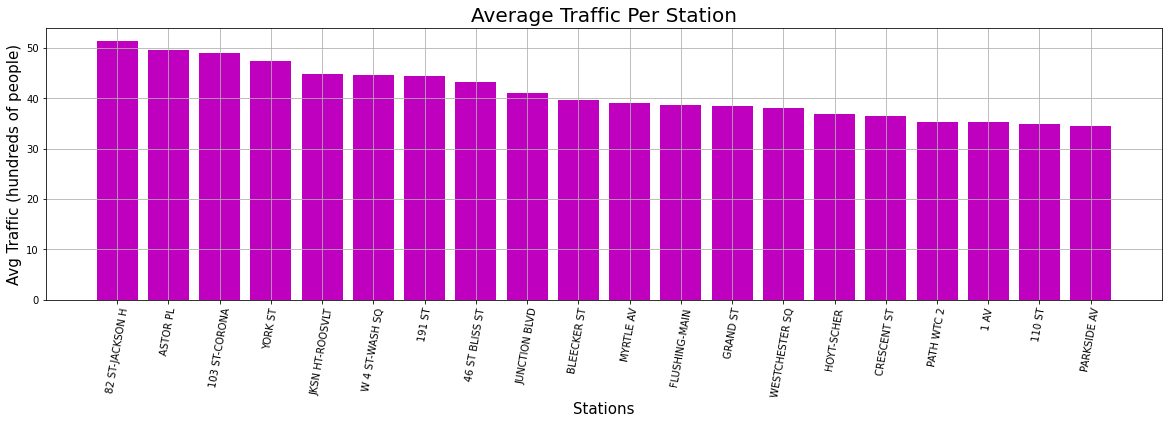

In [54]:
plt.figure(figsize = (20, 5))
plt.bar(stations_totals_top_20.STATION, stations_totals_top_20.DAILY_TRAFFIC, color = 'm')
plt.title('Average Traffic Per Station', fontsize=20, fontweight = 20)
plt.xlabel('Stations', fontsize=15)
plt.xticks(rotation = 80)
plt.ylabel('Avg Traffic (hundreds of people)', fontsize=15)
plt.grid();

In [55]:
avg_turnstiles_timely_total.head()

,STATION,TIME,TIMELY_TRAFFIC
0,1 AV,0,79306.771787
1,1 AV,3,26368.943781
2,1 AV,4,26306.283447
3,1 AV,7,37622.841025
4,1 AV,8,46321.088406


In [56]:
station_names = stations_totals_top_20.STATION.unique()

In [57]:
station_names

array(['82 ST-JACKSON H', 'ASTOR PL', '103 ST-CORONA', 'YORK ST',
       'JKSN HT-ROOSVLT', 'W 4 ST-WASH SQ', '191 ST', '46 ST BLISS ST',
       'JUNCTION BLVD', 'BLEECKER ST', 'MYRTLE AV', 'FLUSHING-MAIN',
       'GRAND ST', 'WESTCHESTER SQ', 'HOYT-SCHER', 'CRESCENT ST',
       'PATH WTC 2', '1 AV', '110 ST', 'PARKSIDE AV'], dtype=object)

In [58]:
jackson_mask = avg_turnstiles_timely_total.STATION.str.contains('82 ST-JACKSON H')
astor_mask = avg_turnstiles_timely_total.STATION.str.contains('ASTOR PL')
corona_mask = avg_turnstiles_timely_total.STATION.str.contains('103 ST-CORONA')
york_mask = avg_turnstiles_timely_total.STATION.str.contains('YORK ST')
roosvlt_mask = avg_turnstiles_timely_total.STATION.str.contains('JKSN HT-ROOSVLT')
wash_mask = avg_turnstiles_timely_total.STATION.str.contains('JKSN HT-ROOSVLT')
one_nine_one_mask = avg_turnstiles_timely_total.STATION.str.contains('191 ST')
bliss_mask = avg_turnstiles_timely_total.STATION.str.contains('46 ST BLISS ST')
junction_mask = avg_turnstiles_timely_total.STATION.str.contains('JUNCTION BLVD')
bleecker_mask = avg_turnstiles_timely_total.STATION.str.contains('BLEECKER ST')
myrtle_mask = avg_turnstiles_timely_total.STATION.str.contains('MYRTLE AV')
flushing_mask = avg_turnstiles_timely_total.STATION.str.contains('FLUSHING-MAIN')
grand_mask = avg_turnstiles_timely_total.STATION.str.contains('GRAND ST')
westchester_mask = avg_turnstiles_timely_total.STATION.str.contains('WESTCHESTER SQ')
hoyt_mask = avg_turnstiles_timely_total.STATION.str.contains('HOYT-SCHER')
crescent_mask = avg_turnstiles_timely_total.STATION.str.contains('CRESCENT ST')
path_mask = avg_turnstiles_timely_total.STATION.str.contains('PATH WTC 2')
one_mask = avg_turnstiles_timely_total.STATION.str.contains('1 AV')
one_ten_mask = avg_turnstiles_timely_total.STATION.str.contains('110 ST')
parkside_mask = avg_turnstiles_timely_total.STATION.str.contains('PARKSIDE AV')

In [59]:
top_20_timely = avg_turnstiles_timely_total[jackson_mask]

In [60]:
top_20_timely = top_20_timely.append(avg_turnstiles_timely_total[astor_mask])

In [61]:
top_20_timely = top_20_timely.append(avg_turnstiles_timely_total[corona_mask])
top_20_timely = top_20_timely.append(avg_turnstiles_timely_total[york_mask])
top_20_timely = top_20_timely.append(avg_turnstiles_timely_total[roosvlt_mask])
top_20_timely = top_20_timely.append(avg_turnstiles_timely_total[wash_mask])
top_20_timely = top_20_timely.append(avg_turnstiles_timely_total[one_nine_one_mask])
top_20_timely = top_20_timely.append(avg_turnstiles_timely_total[bliss_mask])
top_20_timely = top_20_timely.append(avg_turnstiles_timely_total[junction_mask])
top_20_timely = top_20_timely.append(avg_turnstiles_timely_total[bleecker_mask])
top_20_timely = top_20_timely.append(avg_turnstiles_timely_total[myrtle_mask])
top_20_timely = top_20_timely.append(avg_turnstiles_timely_total[flushing_mask])
top_20_timely = top_20_timely.append(avg_turnstiles_timely_total[grand_mask])
top_20_timely = top_20_timely.append(avg_turnstiles_timely_total[westchester_mask])
top_20_timely = top_20_timely.append(avg_turnstiles_timely_total[hoyt_mask])
top_20_timely = top_20_timely.append(avg_turnstiles_timely_total[crescent_mask])
top_20_timely = top_20_timely.append(avg_turnstiles_timely_total[path_mask])
top_20_timely = top_20_timely.append(avg_turnstiles_timely_total[one_mask])
top_20_timely = top_20_timely.append(avg_turnstiles_timely_total[one_ten_mask])
top_20_timely = top_20_timely.append(avg_turnstiles_timely_total[parkside_mask])

In [62]:
mask_0 = top_20_timely.TIME == 0
len(top_20_timely[mask_0])

20

In [63]:
mask_4 = top_20_timely.TIME == 4
len(top_20_timely[mask_4])

20

In [64]:
mask_8 = top_20_timely.TIME == 8
len(top_20_timely[mask_8])

20

In [65]:
mask_12 = top_20_timely.TIME == 12
len(top_20_timely[mask_12])

20

In [66]:
mask_16 = top_20_timely.TIME ==16
len(top_20_timely[mask_16])

20

In [67]:
mask_20 = top_20_timely.TIME == 20
len(top_20_timely[mask_20])

20

In [68]:
top_20_timely_quarterly = top_20_timely[mask_0]

In [69]:
top_20_timely_quarterly = top_20_timely_quarterly.append(top_20_timely[mask_4])
top_20_timely_quarterly = top_20_timely_quarterly.append(top_20_timely[mask_8])
top_20_timely_quarterly = top_20_timely_quarterly.append(top_20_timely[mask_12])
top_20_timely_quarterly = top_20_timely_quarterly.append(top_20_timely[mask_16])
top_20_timely_quarterly = top_20_timely_quarterly.append(top_20_timely[mask_20])

In [70]:
timely_times = top_20_timely_quarterly.TIME.unique()

In [71]:
timely_times

array([ 0,  4,  8, 12, 16, 20], dtype=int64)

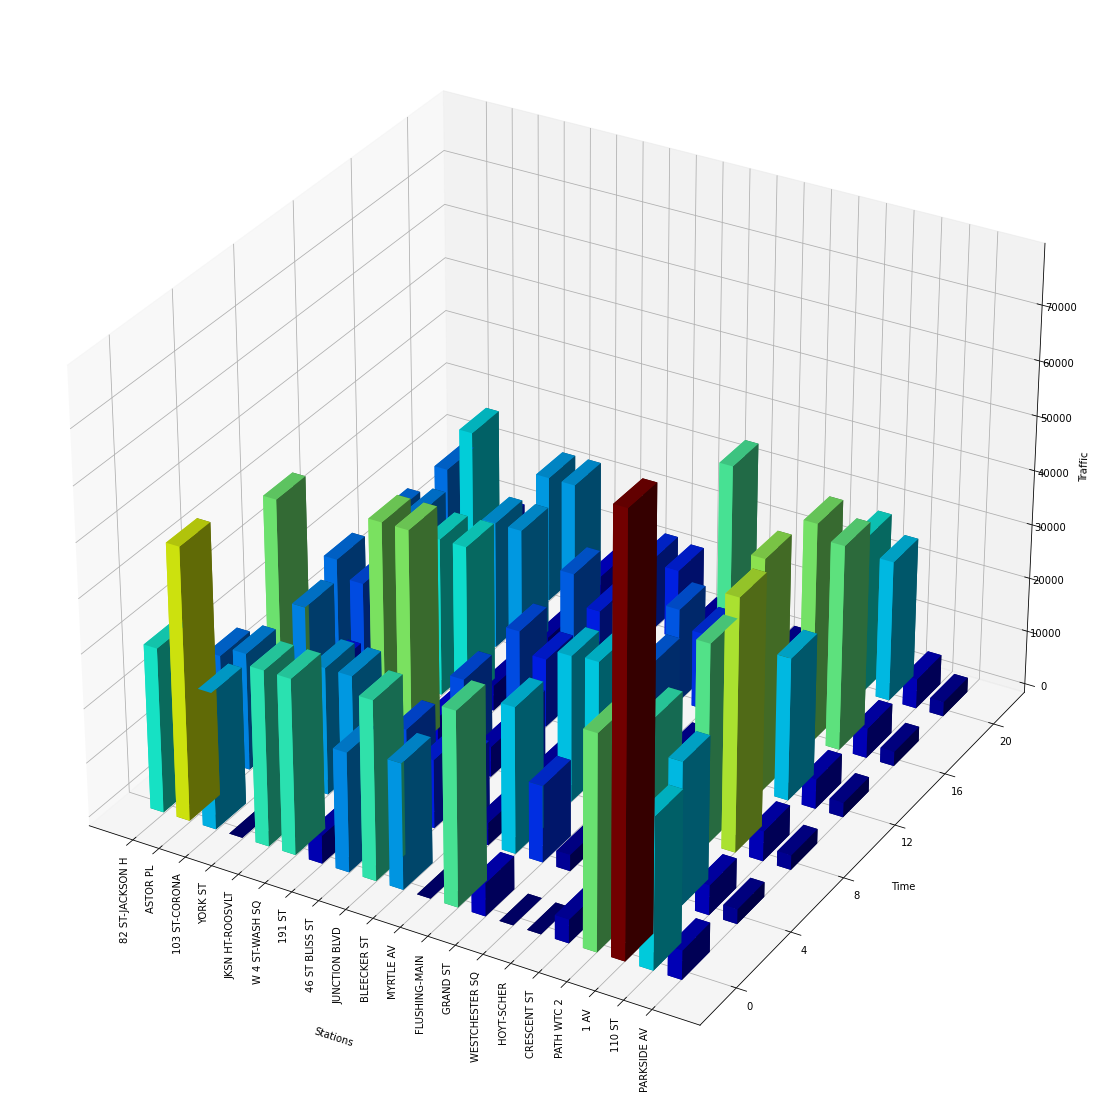

In [72]:
# refered to the following stack overflow pages:
# https://stackoverflow.com/questions/37711538/matplotlib-3d-axes-ticks-labels-and-latex
# https://stackoverflow.com/questions/64709077/how-to-make-error-bars-for-a-3d-bar-graph
# https://stackoverflow.com/questions/44895117/colormap-for-3d-bar-plot-in-matplotlib-applied-to-every-bar

fig=plt.figure(figsize=(40, 20))
ax1=fig.add_subplot(111, projection='3d')
xlabels = np.array(station_names)
xpos = np.arange(xlabels.shape[0])
ylabels = np.array(timely_times)
ypos = np.arange(ylabels.shape[0])
xx, yy = np.meshgrid(xpos, ypos, copy=False)
zpos = np.array(top_20_timely_quarterly.TIMELY_TRAFFIC)
ax1.set_xlabel('Stations', labelpad=60)
ax1.set_ylabel('Time', labelpad=10)
ax1.set_zlabel('Traffic', labelpad=10)
dx=0.5
dy=0.5
dz=zpos
ax1.w_xaxis.set_ticks(xpos + dx/2.)
ax1.w_xaxis.set_ticklabels(xlabels)
ax1.w_yaxis.set_ticks(ypos + dy/2.)
ax1.w_yaxis.set_ticklabels(ylabels)
cmap = cm.get_cmap('jet')
max_height = np.max(dz)
min_height = np.min(dz)
colors = [cmap((k-min_height)/max_height) for k in dz]
ax1.bar3d(xx.ravel(), yy.ravel(), dz*0, dx, dy, dz, color=colors)
plt.xticks(rotation = 90)
plt.show()